<a href="https://colab.research.google.com/github/Utkarshmishra2k2/AutoEstimator--Predict_Your_Car-s_Worth/blob/main/AutoModelEstimator_Car_Price_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In today's fast-paced automotive market, predicting the price of used cars can be a complex and challenging task. Several factors influence a car's price, including its brand, model, age, mileage, engine capacity, fuel type, location, and other features. Accurately predicting car prices not only benefits potential buyers and sellers but can also provide valuable insights to car dealerships, insurance companies, and the broader automotive industry.

The aim of this project is to develop a machine learning model that can predict the price of used cars based on various features. To achieve this, we will utilize several machine learning algorithms, perform data preprocessing, feature engineering, and evaluate different models for their performance. The goal is to create an accurate, efficient model that can generalize well to new, unseen data.

# Importing Libraries


In [1]:
import math
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Data Download and Initial Exploration

In [3]:
import kagglehub
path = kagglehub.dataset_download("avikasliwal/used-cars-price-prediction")
train_01 = pd.read_csv(path + "/train-data.csv")
test_01 = pd.read_csv(path + "/test-data.csv")

100%|██████████| 172k/172k [00:00<00:00, 21.8MB/s]

Extracting files...


In [4]:
train_01 = train_01.drop(['Unnamed: 0' , 'New_Price' ], axis = 1)
test_01 = test_01.drop(['Unnamed: 0' , 'New_Price' ], axis = 1)

In [5]:
print(train_01.shape)
print(train_01.info())
print(test_01.shape)
print(test_01.info())

(6019, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None
(1234, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column            

In [6]:
train_01.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
98,Maruti Wagon R VXI BS IV,Bangalore,2016,62000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,4.45
4701,Land Rover Freelander 2 SE,Pune,2014,85000,Diesel,Automatic,Second,12.39 kmpl,2179 CC,147.51 bhp,5.0,23.00
2310,Maruti Ciaz RS ZDi Plus SHVS,Delhi,2016,38500,Diesel,Manual,Second,28.09 kmpl,1248 CC,88.5 bhp,5.0,7.85
4755,Land Rover Range Rover Evoque 2.0 TD4 HSE Dynamic,Hyderabad,2016,52000,Diesel,Automatic,First,15.68 kmpl,1999 CC,177 bhp,5.0,42.00
4744,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2005,45000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,0.95


In [7]:
test_01.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
155,Hyundai Grand i10 CRDi Magna,Hyderabad,2013,41585,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0
531,Hyundai EON 1.0 Kappa Magna Plus,Coimbatore,2016,18592,Petrol,Manual,First,20.3 kmpl,998 CC,68.05 bhp,5.0
15,BMW X1 sDrive20d,Coimbatore,2013,30788,Diesel,Automatic,First,17.05 kmpl,1995 CC,184 bhp,5.0
842,Ford Figo 1.2P Titanium MT,Jaipur,2016,26189,Petrol,Manual,First,18.16 kmpl,1196 CC,86.8 bhp,5.0
285,Hyundai Verna 1.6 VTVT S,Delhi,2016,27529,Petrol,Manual,Second,17.01 kmpl,1591 CC,121.3 bhp,5.0


In [8]:
print(train_01.shape, test_01.shape)

(6019, 12) (1234, 11)


In [9]:
print(train_01.shape, test_01.shape)

(6019, 12) (1234, 11)


In [10]:
print(train_01.isnull().sum())

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64


In [11]:
print(test_01.isnull().sum())

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


#  Missing Value Handling and Data Preprocessing

In [12]:
train_01["Mileage"] = train_01["Mileage"].str.replace(" km/kg", "")
train_01["Mileage"] = train_01["Mileage"].str.replace(" kmpl", "")

In [13]:
train_01["Mileage"] = pd.to_numeric(train_01["Mileage"])

In [14]:
train_01['Mileage'].replace(0.0,np.nan,inplace=True)

<ipython-input-14-859db498fa67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Mileage'].replace(0.0,np.nan,inplace=True)


In [15]:
print("Mean of Mileage =",np.mean(train_01['Mileage']))

Mean of Mileage = 18.342252479408305


In [16]:
train_01['Mileage'].fillna(value=np.mean(train_01['Mileage']),inplace=True)

<ipython-input-16-d043f61872f3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Mileage'].fillna(value=np.mean(train_01['Mileage']),inplace=True)


In [17]:
train_01["Engine"] = train_01["Engine"].str.replace(" CC", "")

In [18]:
train_01["Engine"] = pd.to_numeric(train_01["Engine"])

In [19]:
train_01['Engine'].replace(0.0,np.nan,inplace=True)

<ipython-input-19-d8b54b84d916>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Engine'].replace(0.0,np.nan,inplace=True)


In [20]:
print("Mean of Engine =",np.mean(train_01['Engine']))

Mean of Engine = 1621.276449941501


In [21]:
train_01['Engine'].fillna(value=np.mean(train_01['Engine']),inplace=True)

<ipython-input-21-85b3c2402a4d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Engine'].fillna(value=np.mean(train_01['Engine']),inplace=True)


In [22]:
train_01["Power"] = train_01["Power"].str.replace(" bhp", "")

In [23]:
train_01["Power"] = train_01["Power"].str.replace("null", "0.0")

In [24]:
train_01["Power"] = pd.to_numeric(train_01["Power"])

In [25]:
train_01['Power'].replace(0.0,np.nan,inplace=True)

<ipython-input-25-8e64021cbae4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Power'].replace(0.0,np.nan,inplace=True)


In [26]:
print("Mean of Power =",np.mean(train_01['Power']))

Mean of Power = 113.25304969366915


In [27]:
train_01['Power'].fillna(value=np.mean(train_01['Power']),inplace=True)

<ipython-input-27-60afe7515492>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Power'].fillna(value=np.mean(train_01['Power']),inplace=True)


In [28]:
train_01['Seats'].replace(0.0,np.nan,inplace=True)

<ipython-input-28-646125b140dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Seats'].replace(0.0,np.nan,inplace=True)


In [29]:
print("Mean of Seats = ",np.mean(train_01['Seats']))

Mean of Seats =  5.2796184738955825


In [30]:
train_01['Seats'].fillna(value=np.mean(train_01['Seats']),inplace=True)

<ipython-input-30-7de08ac48c8d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_01['Seats'].fillna(value=np.mean(train_01['Seats']),inplace=True)


In [31]:
print(train_01.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [32]:
train_01.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.000000,2996.0,362.07000,2.0,54.00
4973,Hyundai Verna CRDi 1.6 SX Option,Hyderabad,2008,109606,Diesel,Manual,First,22.000000,1582.0,126.20000,5.0,2.90
1651,Hyundai Grand i10 AT Asta,Coimbatore,2017,23576,Petrol,Automatic,First,18.900000,1197.0,82.00000,5.0,7.08
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,18.342252,1086.0,113.25305,5.0,1.75
388,Hyundai Verna Transform VTVT,Pune,2010,95000,Petrol,Manual,First,16.200000,1599.0,103.20000,5.0,2.50


In [33]:
train_01.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.151120,599.553865,53.231019,0.803134,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [34]:
train_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [35]:
test_01["Mileage"] = test_01["Mileage"].str.replace(" km/kg", "")
test_01["Mileage"] = test_01["Mileage"].str.replace(" kmpl", "")

In [36]:
test_01["Mileage"] = pd.to_numeric(test_01["Mileage"])

In [37]:
test_01['Mileage'].replace(0.0,np.nan,inplace=True)

<ipython-input-37-54c647d9562d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Mileage'].replace(0.0,np.nan,inplace=True)


In [38]:
print("Mean of Mileage =",np.mean(test_01['Mileage']))

Mean of Mileage = 18.36735462735463


In [39]:
test_01['Mileage'].fillna(value=np.mean(test_01['Mileage']),inplace=True)

<ipython-input-39-421fa9624fe3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Mileage'].fillna(value=np.mean(test_01['Mileage']),inplace=True)


In [40]:
test_01["Engine"] = test_01["Engine"].str.replace(" CC", "")

In [41]:
test_01["Engine"] = pd.to_numeric(test_01["Engine"])

In [42]:
test_01['Engine'].replace(0.0,np.nan,inplace=True)

<ipython-input-42-b270cd1c15ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Engine'].replace(0.0,np.nan,inplace=True)


In [43]:
print("Mean of Engine =",np.mean(test_01['Engine']))

Mean of Engine = 1593.5849673202615


In [44]:
test_01['Engine'].fillna(value=np.mean(test_01['Engine']),inplace=True)

<ipython-input-44-f3a7c1ee48b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Engine'].fillna(value=np.mean(test_01['Engine']),inplace=True)


In [45]:
test_01["Power"] = test_01["Power"].str.replace(" bhp", "")

In [46]:
test_01["Power"] = test_01["Power"].str.replace("null", "0.0")

In [47]:
test_01["Power"] = pd.to_numeric(test_01["Power"])

In [48]:
test_01['Power'].replace(0.0,np.nan,inplace=True)

<ipython-input-48-9eb9d3e370bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Power'].replace(0.0,np.nan,inplace=True)


In [49]:
print("Mean of Power =",np.mean(test_01['Power']))

Mean of Power = 110.38042013311147


In [50]:
test_01['Power'].fillna(value=np.mean(test_01['Power']),inplace=True)

<ipython-input-50-7fae3bf8398b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Power'].fillna(value=np.mean(test_01['Power']),inplace=True)


In [51]:
test_01['Seats'].replace(0.0,np.nan,inplace=True)

<ipython-input-51-107fc21a8606>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Seats'].replace(0.0,np.nan,inplace=True)


In [52]:
print("Mean of Seats = ",np.mean(test_01['Seats']))

Mean of Seats =  5.28454619787408


In [53]:
test_01['Seats'].fillna(value=np.mean(test_01['Seats']),inplace=True)

<ipython-input-53-ffe8de3cb37a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_01['Seats'].fillna(value=np.mean(test_01['Seats']),inplace=True)


In [54]:
print(test_01.isnull().sum())

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64


In [55]:
test_01.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
573,Skoda Superb L&K 2.0 TDI AT,Mumbai,2017,24000,Diesel,Automatic,First,18.19,1968.0,174.50,5.0
717,Volkswagen CrossPolo 1.2 TDI,Hyderabad,2013,80020,Diesel,Manual,Second,22.07,1199.0,74.00,5.0
1064,Maruti Ciaz RS ZDi Plus SHVS,Kochi,2017,45158,Diesel,Manual,Second,28.09,1248.0,88.50,5.0
170,Toyota Etios V,Mumbai,2012,59503,Petrol,Manual,First,16.78,1496.0,88.73,5.0
508,Chevrolet Spark 1.0 LS,Pune,2007,113000,Petrol,Manual,First,18.00,995.0,62.00,5.0


In [56]:
test_01.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,18.367355,1593.584967,110.380420,5.284546
std,3.179700,35598.702098,4.051338,562.054549,50.870564,0.821931
min,1996.000000,1000.000000,7.940000,624.000000,34.200000,2.000000
25%,2011.000000,34000.000000,15.400000,1198.000000,76.200000,5.000000
50%,2014.000000,54572.500000,18.367355,1461.000000,98.600000,5.000000
75%,2016.000000,75000.000000,21.100000,1968.000000,126.300000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


In [57]:
test_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [58]:
train_02 = train_01.copy()
train_02['Brand'] = train_02.Name.str.split().str.get(0)
train_02.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1086,Hyundai i10 Magna 1.2,Kochi,2013,46821,Petrol,Manual,First,20.36,1197.0,78.90,5.0,3.42,Hyundai
3249,Honda Civic 2006-2010 1.8 V AT,Delhi,2011,62000,Petrol,Automatic,First,12.90,1799.0,130.00,5.0,3.75,Honda
1050,Ford EcoSport 1.5 Petrol Titanium Plus AT,Coimbatore,2018,18385,Petrol,Automatic,First,14.80,1497.0,121.36,5.0,12.41,Ford
5890,Hyundai i20 Diesel Asta Option,Pune,2018,31000,Diesel,Manual,First,22.54,1396.0,88.73,5.0,7.75,Hyundai
4236,Audi A4 35 TDI Premium Plus,Kochi,2015,13506,Diesel,Automatic,First,18.25,1968.0,187.74,5.0,21.66,Audi


# Data Visualizations

## Univariate Analysis

In [59]:
print(train_01["Location"].nunique())
print(train_01["Location"].unique())

11
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [60]:
fig = px.bar(train_01, x=train_01['Location'].value_counts().index,
             y=train_01['Location'].value_counts().values,
             title='Distribution of Locations',
             labels={'x': 'Location', 'y': 'Count'},
             color=train_01['Location'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    xaxis_title='Location',
    yaxis_title='Count',
    template='plotly_dark',
    xaxis_tickangle=45,
    bargap=0.1
)
fig.update_traces(text=train_01['Location'].value_counts().values,
                  textposition='outside',
                  texttemplate='%{text}')
fig.show()

**Overall Distribution:**

The distribution of locations appears to be skewed to the right, with a few locations having significantly higher counts than others.


**Top Locations:**

* Mumbai has the highest count of locations, followed by Hyderabad and Kochi.
The top 3 locations (Mumbai, Hyderabad, and Kochi) account for a significant portion of the total count.

**Mid-Range Locations:**

* There is a cluster of locations with counts in the 500-600 range, including Coimbatore, Pune, Delhi, and Kolkata.

**Lower-End Locations:**

* Chennai, Jaipur, Bangalore, and Ahmedabad have the lowest counts.

In [61]:
fig = px.pie(train_01, names=train_01['Location'].value_counts().index,
             values=train_01['Location'].value_counts().values,
             title='Distribution of Locations',
             color=train_01['Location'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Set3,
             template='plotly_dark',
             hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1 if x == 'Top Location' else 0 for x in train_01['Location'].value_counts().index])
fig.show()


**Overall Distribution:**

* The data is distributed across 12 categories (locations).
There is a wide range of percentages, indicating varying levels of representation for each location.

**Top Locations:**

* Mumbai and Hyderabad have the highest representation, with 13.1% and 12.3%, respectively.
The top 3 locations (Mumbai, Hyderabad, and Kochi) account for approximately 36% of the total.

**Mid-Range Locations:**

*Several locations fall in the mid-range, including Coimbatore, Pune, Delhi, Kolkata, Chennai, and Bangalore, with percentages ranging from 8.09% to 10.8%.

**Lower-End Locations:**

* Ahmedabad and Jaipur have the lowest representation, with 3.72% and 6.06%, respectively.

***Potential Insights:***

1. Regional Concentration: The higher percentages for Mumbai and Hyderabad might suggest a concentration of activity or interest in these regions.

2. Diversity: The presence of multiple locations with similar percentages indicates a diverse distribution across different regions.

In [62]:
train_01["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [63]:
fig = px.bar(train_01, x=train_01['Year'].value_counts().index,
             y=train_01['Year'].value_counts().values,
             title='Distribution of Years',
             labels={'x': 'Year', 'y': 'Count'},
             color=train_01['Year'].value_counts().index,
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    xaxis_tickangle=45,
    template='plotly_dark',
    bargap=0.1,
    showlegend=True
)


fig.update_traces(text=train_01['Year'].value_counts().values,
                  textposition='outside',
                  texttemplate='%{text}')

fig.show()


**Overall Distribution:**

* The distribution of data points across the years is not uniform. There is a clear upward trend, indicating an increase in the number of observations over time.
* The distribution appears to be skewed to the right, with a few years having significantly higher counts than others.

**Top Year:**

* 2015 has the highest count, followed by 2010 and 2005.

**Lower-End Years:**

* 2000 has the lowest count, followed by 1998 and 1995.

***Potential Insights:***

1. Growth Trend: The increasing trend in the number of observations suggests a growing dataset or increasing activity over time.

2. Outliers: The significantly lower counts for the earlier years (1995, 1998, and 2000) could be due to various factors, such as data collection limitations or changes in the system being observed.

In [64]:
percentile_85 = train_01['Kilometers_Driven'].quantile(0.99)
train_filtered = train_01[train_01['Kilometers_Driven'] <= percentile_85]
fig = px.histogram(train_filtered, x='Kilometers_Driven', nbins=40,
                   title='Distribution of Kilometers Driven',
                   labels={'Kilometers_Driven': 'Kilometers Driven'},
                   color_discrete_sequence=['maroon'])

fig.update_layout(
    title_text='Kilometers Driven Distribution',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Kilometers Driven',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.2,
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
)

fig.show()

**Overall Distribution:**

* The distribution of kilometers driven appears to be right-skewed. This means that there are more vehicles with lower mileage and fewer vehicles with higher mileage.
The majority of vehicles seem to have driven between 20k and 80k kilometers.

**Peak Mileage:**

* The highest frequency of vehicles is observed in the range of 60k-80k kilometers.

**Tailing Off:**

* As the mileage increases beyond 80k kilometers, the frequency of vehicles starts to decline rapidly.

***Potential Insights:***

1. Vehicle Age: The right-skewed distribution might suggest that the dataset includes a mix of newer and older vehicles. Newer vehicles would generally have lower mileage.
2. Usage Patterns: The peak frequency around 60k-80k kilometers could indicate a common usage pattern, such as vehicles being driven for a certain period before being replaced or sold.

In [65]:
fig = px.box(train_filtered, x='Kilometers_Driven', title='Boxplot of Kilometers Driven')

fig.update_layout(
    xaxis_title='Kilometers Driven',
    yaxis_title='Value',
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='darkblue'),
    template='plotly_dark'
)

fig.show()


**Overall Distribution:**

The distribution of kilometers driven appears to be right-skewed, as indicated by the long whisker on the right side of the boxplot. This means that there are more vehicles with lower mileage and fewer vehicles with higher mileage.

**Central Tendency:**

The median (the line within the box) appears to be around 60,000 kilometers. This suggests that half of the vehicles have driven less than 60,000 kilometers, and half have driven more.
The box itself represents the interquartile range (IQR), which is the range of the middle 50% of the data. In this case, the IQR seems to be between approximately 40,000 and 70,000 kilometers.

**Outliers:**

The dots on the right side of the plot represent outliers, which are data points that fall significantly outside the range of the majority of the data. In this case, there are several outliers with high mileage, further emphasizing the right-skewed nature of the distribution.

***Potential Insights:***

1. Vehicle Age: The right-skewed distribution and presence of outliers with high mileage might suggest that the dataset includes a mix of newer and older vehicles. Newer vehicles would generally have lower mileage.
2. Usage Patterns: The median and IQR give us an idea of the typical range of mileage for most vehicles in the dataset. The outliers with high mileage might represent vehicles that are used extensively or for specific purposes.

In [66]:
fuel_counts = train_01['Fuel_Type'].value_counts().reset_index()
fuel_counts.columns = ['Fuel_Type', 'Count']

fig = px.bar(fuel_counts,
             x='Count',
             y='Fuel_Type',
             orientation='h',
             title='Fuel Type Distribution',
             labels={'Fuel_Type': 'Fuel Type', 'Count': 'Number of Vehicles'},
             color='Fuel_Type',
             color_continuous_scale='Viridis',
             template='plotly_dark'
            )

fig.update_layout(
    xaxis_title="Number of Vehicles",
    yaxis_title="Fuel Type",
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='white'),
    paper_bgcolor='rgb(17,17,17)',
    plot_bgcolor='rgb(17,17,17)',
    font=dict(color='white')  )

fig.show()


**Overall Distribution:**

* The distribution of vehicles across different fuel types is heavily skewed towards diesel and petrol, with a significantly lower number of vehicles using CNG, LPG, and electric fuel types.

**Dominant Fuel Types:**

* Diesel and petrol are the most common fuel types, with diesel having a slightly higher number of vehicles than petrol.

**Less Common Fuel Types:**

* CNG, LPG, and electric vehicles have a significantly lower number of vehicles compared to diesel and petrol.

In [67]:
owner_counts = train_01['Owner_Type'].value_counts().reset_index()
owner_counts.columns = ['Owner_Type', 'Count']
fig = px.pie(owner_counts, names='Owner_Type',
             values='Count',
             title='Distribution of Owner Types',
             color='Owner_Type',
             color_discrete_sequence=px.colors.qualitative.Set3,
             template='plotly_dark',
             hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1 if x == 'Top Location' else 0 for x in train_01['Location'].value_counts().index])
fig.show()


**Overall Distribution:**

* The distribution of owner types is heavily skewed towards the "First" owner category, with a significantly lower number of vehicles in the other categories.
Dominant Owner Type:

* "First" owners represent the vast majority of vehicles, accounting for approximately 81.9% of the total.

**Less Common Owner Types:**

* "Second" owners make up the next largest group, with 16.1% of the vehicles.
"Third" and "Fourth & Above" owners are relatively rare, with 1.88% and 0.15%, respectively.

***Potential Insights:***

1. Market Dynamics: The dominance of "First" owners suggests that a large portion of vehicles are likely new purchases or owned by individuals who have kept their vehicles for a significant period.
2. Resale Market: The smaller percentages of "Second," "Third," and "Fourth & Above" owners might indicate a relatively active resale market, with vehicles changing hands multiple times.

In [68]:
fig = px.histogram(train_01, x='Mileage', nbins=40,
                   title='Distribution of Mileage',
                   labels={'Mileage': 'Mileage'},
                   color_discrete_sequence=['maroon'])

fig.update_layout(
    title_text='Mileage Distribution',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Mileage',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.2,
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
)

fig.show()

**Overall Distribution:**

* The distribution of mileage appears to be roughly bell-shaped or normal, with a central peak and tapering tails on both sides. This indicates that the majority of vehicles have a mileage within a certain range, with fewer vehicles having significantly lower or higher mileage.

**Central Tendency:**

* The peak of the distribution appears to be around 20, suggesting that this is the most common mileage range for vehicles in this dataset.

**Spread:**

* The distribution seems to be relatively narrow, with most of the data concentrated around the peak. This indicates that the vehicles in this dataset have a fairly consistent mileage range.

In [69]:
fig = px.box(train_01, x='Mileage', title='Boxplot of Mileage')

fig.update_layout(
    xaxis_title='Mileage',
    yaxis_title='Value',
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='darkblue'),
    template='plotly_dark'
)

fig.show()


**Overall Distribution:**

* The distribution of mileage appears to be slightly right-skewed, as indicated by the longer whisker on the right side of the boxplot. This means that there are more vehicles with lower mileage and fewer vehicles with higher mileage.

**Central Tendency:**

* The median (the line within the box) appears to be around 17-18. This suggests that half of the vehicles have a mileage of less than 17-18, and half have a higher mileage.
* The box itself represents the interquartile range (IQR), which is the range of the middle 50% of the data. In this case, the IQR seems to be between approximately 15 and 20.

**Outliers:**

* The dots on the right side of the plot represent outliers, which are data points that fall significantly outside the range of the majority of the data. In this case, there are a few outliers with higher mileage, further emphasizing the right-skewed nature of the distribution.

In [70]:
fig = px.histogram(train_01, x='Engine', nbins=40,
                   title='Distribution of Engine Sizes',
                   labels={'Mileage': 'Engine Sizes'},
                   color_discrete_sequence=['LightBlue'])

fig.update_layout(
    title_text='Engine Sizes Distribution',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Engine Sizes',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.2,
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
)

fig.show()

**Overall Distribution:**

* The distribution of engine sizes appears to be right-skewed, with a long tail towards higher engine sizes. This means that there are more vehicles with smaller engines and fewer vehicles with larger engines.
* The distribution has multiple peaks, suggesting that there might be clusters of vehicles with specific engine sizes.

**Central Tendency:**

* The majority of vehicles seem to have engine sizes in the range of 1000-2000 cc. This is where the highest frequency is observed.

**Spread:**

* The distribution is relatively wide, indicating that there is a significant variation in engine sizes across the vehicles.

In [71]:
fig = px.histogram(train_01, x='Power', nbins=40,
                   title='Distribution of Power ',
                   labels={'Power': 'Power '},
                   color_discrete_sequence=['Lightgreen'])

fig.update_layout(
    title_text='Power Distribution',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Power',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.2,
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
)

fig.show()

In [72]:
fig = px.histogram(train_01, x='Seats', nbins=40,
                   title='Distribution of Seats ',
                   labels={'Seats': 'Seats Coynts '},
                   color_discrete_sequence=['Lightgreen'])

fig.update_layout(
    title_text='Seats Distribution',
    title_x=0.5,
    title_font_size=20,
    xaxis_title='Seats',
    yaxis_title='Frequency',
    template='plotly_dark',
    bargap=0.2,
    xaxis=dict(showgrid=True, zeroline=False),
    yaxis=dict(showgrid=True, zeroline=False),
)

fig.show()

**Overall Distribution:**

* The distribution of power seems to be right-skewed, with a long tail towards higher power values. This means that there are more devices with lower power consumption and fewer devices with higher power consumption.
* The distribution has multiple peaks, suggesting that there might be clusters of devices with specific power consumption ranges.

**Central Tendency:**

* The majority of devices seem to have power consumption in the range of 50-100 watts. This is where the highest frequency is observed.

**Spread:**

* The distribution is relatively wide, indicating that there is a significant variation in power consumption across the devices.

In [73]:
fig = px.box(train_01, x='Price', title='Boxplot of Car Prices')

fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Value',
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='darkblue'),
    template='plotly_dark'
)

fig.show()


**Overall Distribution:**

* The distribution of prices appears to be heavily right-skewed, as indicated by the long whisker on the right side of the boxplot. This means that there are many products with lower prices and fewer products with very high prices.

**Central Tendency:**

* The median (the line within the box) appears to be around 15. This suggests that half of the products have a price of less than 15, and half have a higher price.
* The box itself represents the interquartile range (IQR), which is the range of the middle 50% of the data. In this case, the IQR seems to be quite narrow, indicating that the majority of products are priced within a relatively small range.

**Outliers:**

* The dots on the right side of the plot represent outliers, which are data points that fall significantly outside the range of the majority of the data.
* In this case, there are several outliers with very high prices, further emphasizing the right-skewed nature of the distribution.

In [74]:
fig = px.violin(train_01,
                x='Price',
                box=True,
                points='all',
                title='Violin Plot of Car Prices')

fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, family='Arial', color='white'),
    yaxis_title="Values",
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    font=dict(color='white')
)

fig.show()


**Overall Distribution:**

* The distribution of car prices is highly right-skewed, with a long tail towards higher prices. This indicates that most cars are priced relatively low, while a few high-end cars significantly increase the overall price range.
* The violin plot's shape suggests that the distribution might be multimodal, with potential clusters of prices at different levels.

**Central Tendency:**

* The median price, represented by the horizontal line within the box plot, appears to be around 15. This means that half of the cars are priced below 15, and half are priced higher.
* The box plot also shows the interquartile range (IQR), which is the range of the middle 50% of the data. In this case, the IQR seems to be quite narrow, indicating that the majority of cars are priced within a relatively small range.

**Outliers:**

* The numerous dots scattered along the x-axis represent individual data points that are considered outliers. These outliers are primarily located in the higher price range, further emphasizing the right-skewed nature of the distribution.

## Bivariate Analysis

In [75]:
avg_price_by_year = train_01.groupby('Year')['Price'].mean().reset_index()

fig = px.line(
    avg_price_by_year,
    x='Year',
    y='Price',
    title='Average Car Price by Year',
    labels={'Year': 'Car Year', 'Price': 'Average Price (in $)'},
    line_shape='linear' ,
    template='plotly_dark'
)

fig.show()

**Overall Trend:**

* The average car price has shown an overall increasing trend from 2000 to 2020. This indicates that the cost of cars has generally risen over this period.

**Specific Trends:**

* There are periods of more rapid price increases, such as between 2010 and 2015, and periods of slower growth, like between 2000 and 2005.
* There are also some fluctuations and temporary decreases in the average price, suggesting that factors like economic conditions or market trends can influence car prices.

***Potential Insights:***

1. Inflation and Economic Factors: The overall upward trend might be influenced by factors like inflation, economic growth, and increased consumer demand for cars.
2.  Technological Advancements: New technologies, features, and stricter safety regulations can increase the cost of manufacturing and thus the final price of cars.
3. Market Dynamics: Fluctuations in the market, such as changes in fuel prices, interest rates, or consumer preferences, can impact the average car price.

In [76]:
fig = px.scatter(
    train_01,
    x='Kilometers_Driven',
    y='Price',
    size='Power',
    color='Power',
    template="plotly_dark",
    title="Kilometers Driven vs Price",
    labels={'Kilometers_Driven': 'Kilometers Driven', 'Price': 'Price (in $)', 'Power': 'Power'}
)

fig.show()

**Overall Relationship:**

* There appears to be a weak negative correlation between Kilometers Driven and Price. This means that, generally, as the kilometers driven increase, the price tends to decrease. However, the relationship is not very strong, as there is significant scatter in the data points.

**Clusters and Outliers:**

* The plot shows clusters of points, indicating groups of cars with similar price and mileage combinations.
* There are also some outliers, which are points that deviate significantly from the general trend. These outliers might represent unique or rare cars with high prices and low mileage, or vice versa.

**Impact of Power:**

* The color of the bubbles represents the power of the car. It seems that cars with higher power tend to be more expensive, regardless of the mileage. However, there is still significant overlap between different power levels and prices.

In [77]:
columns_to_plot = ['Mileage', 'Power', 'Kilometers_Driven', 'Engine']
for column in columns_to_plot:
    fig = px.scatter(train_01, x=column, y='Price', trendline='ols',
                     title=f"{column} vs Price",
                     template="plotly_dark",
                     labels={column: f"{column}", 'Price': 'Price (in INR)'})

    fig.show()


**Mileage and Price:**
* A weak negative correlation exists, meaning as mileage increases, price tends to decrease. However, the relationship is not strong due to significant scatter and outliers.

**Power and Price:**
* A weak positive correlation shows that cars with higher power tend to have higher prices, but the relationship is weak, with significant variability.

**Kilometers Driven and Price:**
* There is a weak negative correlation, where higher kilometers driven generally results in lower prices, though the trend is not strong due to scattered data.

**Engine Size and Price:**
* A weak positive correlation indicates that larger engines tend to have higher prices, but the relationship is weak, with considerable scatter.

## MulitVarite Analysis

In [78]:

fig = px.scatter_3d(
    train_01,
    x='Kilometers_Driven',
    y='Mileage',
    z='Price',
    color='Price',
    template="plotly_dark",
    title="3D Scatter Plot: Kilometers, Mileage vs Price",
    labels={'Kilometers_Driven': 'Kilometers Driven', 'Mileage': 'Mileage', 'Price': 'Price (in $)'}
)

fig.show()


**Overall Relationship:**

* The 3D plot reinforces the weak negative correlation between kilometers driven and price. However, it shows that price is also influenced by other factors, notably power.

**Clusters and Outliers:**

* Clusters of cars with similar price, mileage, and power combinations are visible.
* Outliers are present, representing cars with unusual combinations, such as low mileage but high prices or vice versa.

**Impact of Power:**

* Power is indicated by the color of the bubbles, and cars with higher power tend to have higher prices, regardless of their mileage or kilometers driven. However, there is still significant overlap, suggesting that power alone is not a strong predictor of price.

In [79]:
fig_sunburst = px.sunburst(train_02, path=['Fuel_Type', 'Brand'], values='Mileage',
                           title="Fuel Type vs Brand Distribution of Mileage",
                           labels={'Fuel_Type': 'Fuel Type', 'Brand': 'Brand', 'Mileage': 'Mileage (km/l)'},
                           template='plotly_dark')

fig_sunburst.show()


**Overall Distribution:**

* The distribution of car brands is dominated by petrol and diesel fuel types.
* There is a significant difference in the number of cars using petrol and diesel fuel types.
* The number of cars using other fuel types (electric, CNG, LPG) is negligible.

**Brand-wise Distribution:**

* Petrol: Maruti, Hyundai, and Honda appear to be the most popular brands for petrol cars.
* Diesel: Mahindra, Ford, and Toyota seem to be the most popular brands for diesel cars.

***Potential Insights:***

1. Market Dominance: Maruti and Hyundai appear to have a significant market share in the petrol car segment.

In [80]:
fig = px.box(train_01, x='Transmission', y='Mileage',
             title="Transmission vs Mileage",
             labels={'Transmission': 'Transmission Type', 'Mileage': 'Mileage (km/l)'},
             template='plotly_dark')

fig.update_layout(
    xaxis_title="Transmission Type",
    yaxis_title="Mileage (km/l)",
    title_x=0.5,
    title_font=dict(size=30),
    xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['Manual', 'Automatic'])
)

fig.show()


**Overall Mileage:**

* Manual Transmission: The majority of cars with manual transmission have a mileage between 17 and 22 km/l. The median mileage for manual transmission cars is around 20 km/l.
* Automatic Transmission: The majority of cars with automatic transmission have a mileage between 15 and 19 km/l. The median mileage for automatic transmission cars is around 17 km/l.

**Variability:**

* Manual Transmission: The spread of mileage values for manual transmission cars is wider, with a range of approximately 15 to 32 km/l.
* Automatic Transmission: The spread of mileage values for automatic transmission cars is narrower, with a range of approximately 10 to 27 km/l.

**Outliers:**

* Manual Transmission: There is one outlier on the higher end of the mileage range for manual transmission cars.
* Automatic Transmission: There are two outliers on the higher end of the mileage range for automatic transmission cars.

**Comparison:**

* Median Mileage: Manual transmission cars generally have a higher median mileage compared to automatic transmission cars.
* Variability: Manual transmission cars exhibit higher variability in mileage compared to automatic transmission cars.

In [81]:

fig = px.bar(train_02.groupby('Brand')['Power'].mean().reset_index(),
             x='Brand', y='Power',
             title="Brand vs Power",
             labels={'Brand': 'Brand', 'Power': 'Average Power (HP)'},
             color='Brand',
             template='plotly_dark')

fig.update_layout(
    xaxis_title="Brand",
    yaxis_title="Average Power (HP)",
    title_x=0.5,
    title_font=dict(size=30),
    xaxis_tickangle=-45,
)

fig.show()

**Overall Power:**

* The majority of car brands have an average power output between 100 and 200 HP.There are a few brands with average power output exceeding 300 HP.

**Variability:**

* There is a significant variation in average power across different car brands.
Some brands have a much higher average power output compared to others.

**Comparison:**

* Brands with the highest average power output include Lamborghini, Mahindra, and Maruti.
* Brands with the lowest average power output include Ambassador, Audi, and BMW.

In [82]:
fig = px.histogram(
    train_01,
    x='Price',
    facet_col='Location',
    facet_row='Transmission',
    color='Fuel_Type',
    nbins=50,
    title="Car Price Distribution by Location, Transmission, and Fuel Type",
    template="plotly_dark",
    labels={
        'Price': 'Car Price (in $)',
        'Location': 'Car Location',
        'Transmission': 'Transmission Type',
        'Fuel_Type': 'Fuel Type',
        'Seats': 'Number of Seats',
        'Owner_Type': 'Owner Type',
        'Brand': 'Car Brand'
    }
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50, b=50, l=50, r=50),
    showlegend=True,
    legend_title="Fuel Type",
)

fig.show()

**Overall Price Distribution:**

* The majority of car prices fall within the range of $0 to $100.
There are some car prices that exceed $150.

**Variability:**

* There is a significant variation in car prices across different locations, transmission types, and fuel types.
Some locations, transmission types, and fuel types have a higher number of cars with higher prices compared to others.

**Comparison:**

* Locations: Mumbai and Delhi have the highest number of cars with prices exceeding 150.
* Transmission Type: Manual transmission cars have a higher number of cars with prices exceeding Rs150 compared to automatic transmission cars.
* Fuel Type: CNG and Petrol cars have a higher number of cars with prices exceeding $150 compared to Diesel, LPG, and Electric cars.

In [83]:
fig = px.parallel_categories(
    train_02,
    dimensions=['Location', 'Transmission', 'Fuel_Type', 'Seats', 'Owner_Type', 'Brand'],
    color='Price',
    color_continuous_scale='Viridis',
    title="Car Price Analysis Based on Features",
    template="plotly_dark",
    labels={
        'Location': 'Car Location',
        'Transmission': 'Transmission Type',
        'Fuel_Type': 'Fuel Type',
        'Seats': 'Number of Seats',
        'Owner_Type': 'Owner Type',
        'Brand': 'Car Brand',
        'Price': 'Price (in ₹)'
    }
)

fig.update_traces(
    hovertemplate="%{dimension}: %{label}<br>Price: %{color:.2f}<extra></extra>"  # Format hover data
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    margin=dict(t=50, b=50, l=50, r=50),
)

fig.show()

**Price Distribution:**

* The majority of car prices appear to fall within the range of 20 to 100.
* There are some car prices that exceed 140, with a few outliers reaching even higher price points.

**Variability:**

* There is a significant variation in car prices across different car brands.
* Some brands, such as Hyundai and Honda, have a higher number of cars with higher prices compared to others like Lamborghini and Ferrari.

**Feature Influence:**

* The chord diagram suggests that certain features might be associated with higher car prices. For example, cars from Mumbai or Delhi, with automatic transmission, petrol or CNG fuel, and a higher number of seats, seem to have a higher proportion of cars with higher prices.
* However, without more specific data and statistical analysis, it's difficult to quantify the exact impact of each feature on price.

# Data Preprocessing for Models

In [84]:
scaler = StandardScaler()
numeric_columns = test_01.select_dtypes(include=['number']).columns

train_01[numeric_columns] = scaler.fit_transform(train_01[numeric_columns])
test_01[numeric_columns] = scaler.fit_transform(test_01[numeric_columns])

In [85]:
label_encoder = LabelEncoder()

cat_columns = test_01.select_dtypes(exclude=['number']).columns

for column in cat_columns:
    train_01[column] = label_encoder.fit_transform(train_01[column])
    test_01[column] = label_encoder.fit_transform(test_01[column])

In [86]:
X = train_01.iloc[:,:-1]
Y = train_01.iloc[:,-1]

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    y_pred_train = model.predict(X_train)
    y_pred_dev = model.predict(X_test)
    mse_train = mean_squared_error(Y_train, y_pred_train)
    r2_train = r2_score(Y_train, y_pred_train)
    mse_dev = mean_squared_error(Y_test, y_pred_dev)
    r2_dev = r2_score(Y_test, y_pred_dev)

    print("MSE on Training Set:", mse_train)
    print("R² on Training Set :", r2_train)
    print("MSE on Testing Set :", mse_dev)
    print("R² on Testing Set:", r2_dev)

# Modelling

## 1. Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [90]:
print(lr.intercept_,lr.coef_,lr.feature_names_in_)

14.636689304164662 [ 1.48481014e-04 -2.24975451e-01  2.85505348e+00 -2.21469961e+00
 -8.64848145e-01 -2.80684414e+00  2.12871240e-02 -5.34236150e-01
  8.06406746e-01  6.46166398e+00 -7.48573573e-01] ['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats']




> The Regression Equation : -



**Price** = 14.6367 + 1.48481014×10−4 × *Name*  −0.*224975451 × Location* + 2.85505348 × *Year* − 2.21469961 × *Kilometers_Driven* − 0.864848145 × *Fuel_Type* − 2.80684414 × *Transmission* + 0.021287124 × *Owner_Type* − 0.53423615 × *Mileage* + 0.806406746 × *Engine* + 6.46166398 × *Power* − 0 . 748573573 × *Seats*

In [91]:
val = [1.48481014e-04, 2.24975451e-01, 2.85505348e+00, 2.21469961e+00,
       8.64848145e-01, 2.80684414e+00, 2.12871240e-02, 5.34236150e-01,
       8.06406746e-01, 6.46166398e+00, 7.48573573e-01]

name = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
        'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
        'Seats']
data = pd.DataFrame({'Category': name, 'Value': val})

fig = px.pie(data, names='Category', values='Value',
             title="Distribution of Car Features",
             color='Category',
             color_discrete_sequence=px.colors.sequential.Plasma,
             hole=0.3,
             template="plotly_dark",
             labels={'Category': 'Car Features', 'Value': 'Distribution Value'},
             hover_data=['Value'])


fig.update_traces(hovertemplate="Category: %{label}<br>Value: %{value:,.2f}")


fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, family="Arial", color="darkblue"),
    legend_title="Feature Categories",
    legend=dict(title='Categories', orientation='h', x=0.5, xanchor='center', y=-0.1),
    margin=dict(t=40, b=40, l=40, r=40)
)

fig.show()

In [92]:
evaluate_model(lr, X_train, Y_train, X_test, Y_test)

MSE on Training Set: 37.17039460205528
R² on Training Set : 0.7042151292742898
MSE on Testing Set : 66.42066460403105
R² on Testing Set: 0.4602556569820859


In [93]:
cv_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)

print("Cross-validated MSE:", -mean_cv_score)

Cross-validated MSE: 37.945587255411176


## 2. Decision Tree Regression

In [94]:
dt = DecisionTreeRegressor(splitter='best', max_depth=5)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [95]:
tree_rules = export_text(dt, feature_names=name)
print("Decision Tree Rules:\n")
print(tree_rules)

Decision Tree Rules:

|--- Power <= 0.97
|   |--- Engine <= 0.56
|   |   |--- Year <= 0.04
|   |   |   |--- Year <= -0.57
|   |   |   |   |--- Engine <= -0.02
|   |   |   |   |   |--- value: [2.35]
|   |   |   |   |--- Engine >  -0.02
|   |   |   |   |   |--- value: [4.22]
|   |   |   |--- Year >  -0.57
|   |   |   |   |--- Power <= -0.49
|   |   |   |   |   |--- value: [3.43]
|   |   |   |   |--- Power >  -0.49
|   |   |   |   |   |--- value: [5.18]
|   |   |--- Year >  0.04
|   |   |   |--- Power <= -0.12
|   |   |   |   |--- Power <= -0.75
|   |   |   |   |   |--- value: [3.66]
|   |   |   |   |--- Power >  -0.75
|   |   |   |   |   |--- value: [6.10]
|   |   |   |--- Power >  -0.12
|   |   |   |   |--- Seats <= -0.97
|   |   |   |   |   |--- value: [26.86]
|   |   |   |   |--- Seats >  -0.97
|   |   |   |   |   |--- value: [9.60]
|   |--- Engine >  0.56
|   |   |--- Kilometers_Driven <= -0.20
|   |   |   |--- Transmission <= 0.50
|   |   |   |   |--- Year <= 0.96
|   |   |   |   | 

In [96]:
print("Feature Importances:", dt.feature_importances_)

Feature Importances: [0.02149936 0.         0.17009345 0.04000411 0.         0.00769931
 0.         0.         0.03446803 0.72022035 0.00601539]


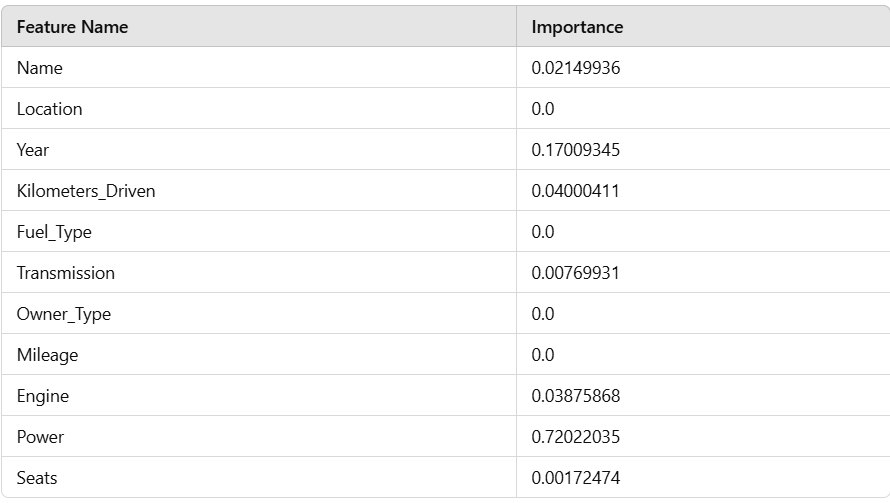

In [97]:
evaluate_model(dt, X_train, Y_train, X_test, Y_test)

MSE on Training Set: 18.976705654257255
R² on Training Set : 0.8489921215839347
MSE on Testing Set : 25.529986524483718
R² on Testing Set: 0.7925394771934068


In [98]:
cv_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print("Cross-validated MSE:", -mean_cv_score)

Cross-validated MSE: 27.86904037560218


## 3. Random Forest Regression

In [99]:
rf = RandomForestRegressor(n_estimators=20, max_depth=5)
rf.fit(X_train, Y_train)

evaluate_model(rf, X_train, Y_train, X_test, Y_test)

cv_scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)

print("Cross-validated MSE:", -mean_cv_score)

MSE on Training Set: 14.950275307844782
R² on Training Set : 0.8810325987499703
MSE on Testing Set : 20.98685459071671
R² on Testing Set: 0.8294576528162078
Cross-validated MSE: 20.551762784598004


## 4. XGBoost

In [100]:
xgb_model = xgb.XGBRegressor(
    n_estimators=15,
    eta=0.2,
    gamma=1,
    max_depth=10,
    reg_lambda=1,
    random_state=42
)

xgb_model.fit(X_train, Y_train)

evaluate_model(xgb_model, X_train, Y_train, X_test, Y_test)

cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)

print(f"Cross-validated MSE: {-mean_cv_score}")

MSE on Training Set: 1.5418269351874638
R² on Training Set : 0.9877308517816858
MSE on Testing Set : 15.900253292179631
R² on Testing Set: 0.8707921425031168
Cross-validated MSE: 15.445733555632064


## 5. Cross-validation and Hyperparameter Tuning of Random Forest Regression

In [101]:
rf = RandomForestRegressor(random_state=42)

param_dist = {
    "criterion": ['squared_error', 'absolute_error'],
    "n_estimators": [10, 50, 100],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_model = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, Y_train)

print("Best Cross-Validation Score:", rf_model.best_score_)
print("Best Parameters:", rf_model.best_estimator_.get_params())

best_rf = rf_model.best_estimator_

train_pred = best_rf.predict(X_train)
test_pred = best_rf.predict(X_test)

mse_train = mean_squared_error(Y_train, train_pred)
r2_train = r2_score(Y_train, train_pred)

mse_test = mean_squared_error(Y_test, test_pred)
r2_test = r2_score(Y_test, test_pred)

print(f"MSE on Training Set: {mse_train}")
print(f"R² on Training Set: {r2_train}")
print(f"MSE on Test Set: {mse_test}")
print(f"R² on Test Set: {r2_test}")

# Cross-validation scores
cv_scores = rf_model.cv_results_['mean_test_score']
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Cross-Validation Score: 0.8816736168280436
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
MSE on Training Set: 3.0922182170711334
R² on Training Set: 0.9753935524391366
MSE on Test Set: 14.874174794993777
R² on Test Set: 0.8791302111998094
Cross-validation scores: [0.88124367 0.88167362 0.87967722 0.87966586 0.86912321 0.87925694
 0.86609311 0.86882365 0.83894521 0.83864036 0.87759907 0.86979718
 0.86757682 0.83689763 0.87733855 0.87900863 0.86624218 0.87417607
 0.8370141  0.87753821]
Average cross-validation score: 0.8673165637957847


# Model Evaluation

In [102]:
model_comparison = []

def evaluate_model_and_store_results(model_name, model, X_train, Y_train, X_test, Y_test):
    y_pred_train = model.predict(X_train)
    y_pred_dev = model.predict(X_test)

    mse_train = mean_squared_error(Y_train, y_pred_train)
    r2_train = r2_score(Y_train, y_pred_train)
    mse_dev = mean_squared_error(Y_test, y_pred_dev)
    r2_dev = r2_score(Y_test, y_pred_dev)

    model_comparison.append({
        'Model': model_name,
        'MSE on Training Set': mse_train,
        'R² on Training Set': r2_train,
        'MSE on Testing Set': mse_dev,
        'R² on Testing Set': r2_dev
    })

models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': best_rf,
    'XGBoost': xgb_model
}

for model_name, model in models.items():
    evaluate_model_and_store_results(model_name, model, X_train, Y_train, X_test, Y_test)

model_comparison_df = pd.DataFrame(model_comparison)

print("\nModel Performance Comparison:")
print(model_comparison_df)


Model Performance Comparison:
               Model  MSE on Training Set  R² on Training Set  \
0  Linear Regression            37.170395            0.704215   
1      Decision Tree            18.976706            0.848992   
2      Random Forest             3.092218            0.975394   
3            XGBoost             1.541827            0.987731   

   MSE on Testing Set  R² on Testing Set  
0           66.420665           0.460256  
1           25.529987           0.792539  
2           14.874175           0.879130  
3           15.900253           0.870792  


In [103]:
print("The End")

The End
